In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
x = df.drop(['stories','hotwaterheating','mainroad','guestroom','basement','airconditioning','parking','prefarea','furnishingstatus'],axis = 'columns')
x.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [ ]:
%pip install scikit-learn

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x.drop('price',axis='columns'),x.price)


LinearRegression()

In [9]:
reg.coef_

array([3.78762754e+02, 4.06820034e+05, 1.38604950e+06])

In [10]:
reg.intercept_

np.float64(-173171.6076326333)

Predicting price for house of 4500sqft., 5 bedroom, 4 bathroom

In [14]:
reg.predict([[4500,5,4]])

C:\Users\reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9109558.94351023])

Predicting price of a house of 2200sqft.,3 bedroom , 3 bathroom

In [15]:
reg.predict([[2200,3,3]])

C:\Users\reddy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6038715.04493513])

Lets split into test and training dataset and score the model

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x.drop('price',axis='columns'),x.price,test_size=0.3,random_state=42)

In [17]:
X_train.head()

,area,bedrooms,bathrooms
126,7160,3,1
363,3584,2,1
370,4280,2,1
31,7000,3,1
113,9620,3,1


Lets fit the training dataset into model

In [18]:
reg1 = linear_model.LinearRegression()
reg1.fit(X_train,y_train)
reg1.score(X_test,y_test)

0.44736815556478504

In [ ]:
%pip install matplotlib

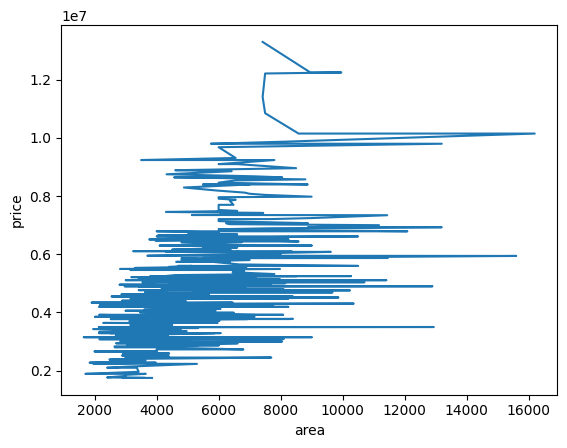

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x.area,x.price)
plt.xlabel('area')
plt.ylabel('price')
plt.show()


Linear Regression might not be the best fit for this dataset